# Steps

## 1. [Import the Libraries](#1.-Import-the-libraries) 
## 2. [Load the Data](#2.-Load-the-data)
## 3. [Data information](#3.-Understand-the-Data)
- 3.2 [Code](#3.1-code)
- 3.1 [Insights](#3.2-Insights-from-Data)
## 4. [Visualize the Data](#4.-Explore-the-Data)

## 1. Import the libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## 2. Load the data

([🔝 Return to Top](#Steps))

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## 3. Understand the Data

([🔝 Return to Top](#Steps))

### 3.1 code

In [4]:
print(train_data.shape) # target column is 'Fertilizer Name'
print(test_data.shape)
print(train_data.columns.tolist()) # the columns in List data structure

(750000, 10)
(250000, 9)
['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']


In [5]:
########### Set 'id' as Index ##################

train_data.set_index('id', inplace = True) # shape = (750000, 9)
test_data.set_index('id', inplace = True)  # shape = (250000, 8)

In [6]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature      750000 non-null  int64 
 1   Humidity         750000 non-null  int64 
 2   Moisture         750000 non-null  int64 
 3   Soil Type        750000 non-null  object
 4   Crop Type        750000 non-null  object
 5   Nitrogen         750000 non-null  int64 
 6   Potassium        750000 non-null  int64 
 7   Phosphorous      750000 non-null  int64 
 8   Fertilizer Name  750000 non-null  object
dtypes: int64(6), object(3)
memory usage: 57.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 750000 to 999999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Temparature  250000 non-null  int64 
 1   Humidity     250000 non-null  int64 
 2   Moisture     250000 non-null  int64 
 3   Soil Typ

In [7]:
round(train_data.describe(),1)

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.0,750000.0,750000.0,750000.0,750000.0,750000.0
mean,31.5,61.0,45.2,23.1,9.5,21.1
std,4.0,6.6,11.8,11.2,5.8,12.3
min,25.0,50.0,25.0,4.0,0.0,0.0
25%,28.0,55.0,35.0,13.0,4.0,10.0
50%,32.0,61.0,45.0,23.0,9.0,21.0
75%,35.0,67.0,55.0,33.0,14.0,32.0
max,38.0,72.0,65.0,42.0,19.0,42.0


In [8]:
print(train_data.isna().sum()) # No null values
print(test_data.isna().sum())  # No null values

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64
Temparature    0
Humidity       0
Moisture       0
Soil Type      0
Crop Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
dtype: int64


In [9]:
print(train_data.duplicated().sum()) # No duplicated rows
print(test_data.duplicated().sum()) # No duplicated rows
#df.drop_duplicates() ->  to remove duplicates

0
0


In [10]:
train_data.head(2)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
id,,,,,,,,,
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,27,69,65,Sandy,Millets,30,6,18,28-28


In [11]:
test_data.head(2)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
id,,,,,,,,
750000,31,70,52,Sandy,Wheat,34,11,24
750001,27,62,45,Red,Sugarcane,30,14,15


In [12]:
print(train_data['Soil Type'].value_counts()) # 5 soil types
print('--------------------------------')
print(train_data['Crop Type'].value_counts()) # 11 crop types
print('--------------------------------')
print(train_data['Fertilizer Name'].value_counts())  # 7 fertilizers types

Soil Type
Sandy     156710
Black     150956
Clayey    148382
Red       148102
Loamy     145850
Name: count, dtype: int64
--------------------------------
Crop Type
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: count, dtype: int64
--------------------------------
Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64


In [13]:
categorial_columns = [col for col in train_data.columns if train_data[col].dtype == 'O']
# ['Soil Type', 'Crop Type', 'Fertilizer Name']
numeric_columns = [col for col in train_data.columns if train_data[col].dtype != 'object']
# ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

### 3.2 Insights from Data

([🔝 Return to Top](#Steps))

##### Basic table info
- Total 10,00,000 rows of data
- train.csv
  1. 7,50,000 rows
  2. 10 columns(having target columns - 'Fertilizer Name')
  3. Column Names - ['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']
- test.csv
  1. 2,50,000 rows
  2. 9 columns
  3. Column names - ['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']
- Categorical Columns - ['Soil Type', 'Crop Type', 'Fertilizer Name']
- Numeric Columns - ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

##### Data cleaning info

- No NaN or Null values.
- No Duplicate rows.

##### Categorical Columns info

- Fertilizer Name Column (Target Column or Dependent variable).
    1. 7 - Fertilizer Names
    2. ["14-35-14", "10-26-26", "17-17-17", "28-28", "20-20", "DAP", "Urea"]

- Soil Type Column (Feature Column or Independent Variable)
    1. 5 - Soil Types
    2. ["Sandy", "Black", "Clayey", "Red", "Loamy"]

- Crop Type Column (Feature Column or Independent Variable)
    1. 11 - Crop Types
    2. ["Paddy", "Pulses", "Cotton", "Tobacco", "Wheat", "Millets", "Barley", "Sugarcane", "Oil seeds", "Maize", "Ground Nuts"]

##### Numerical Column info
1. 🌡️ Temperature
- Range: 25.0°C to 38.0°C
- Mean: 31.5°C
- Insight: The average temperature falls within a warm range, ideal for tropical and subtropical crops like paddy, cotton, and maize. A relatively narrow standard deviation (4.0) indicates temperature conditions are fairly stable across samples.

2. 💧 Humidity
- Range: 50.0% to 72.0%
- Mean: 61.0%
- Insight: The data reflects moderate to high humidity. Most crops such as paddy, sugarcane, and pulses benefit from these moisture levels in the air. A standard deviation of 6.6 shows some fluctuation, but it's not extreme.

3. 🌱 Soil Moisture
- Range: 25.0 to 65.0 units
- Mean: 45.2
- Insight: The average moisture level is well-balanced, suggesting moderately moist soil, suitable for a wide range of crops. The spread (std = 11.8) shows variability across different regions or irrigation levels.

4. 🌾 Nitrogen
- Range: 4.0 to 42.0
- Mean: 23.1
- Insight: Nitrogen levels are centered around moderate values, necessary for leafy growth. The broad spread (std = 11.2) indicates that fertilizer application or soil quality varies widely, which could affect yield consistency.

5. 🧂 Potassium
- Range: 0.0 to 19.0
- Mean: 9.5
- Insight: Potassium is essential for fruiting and root development. While the average level is moderate, the presence of 0.0 as a minimum suggests some samples may be nutrient-deficient, possibly needing supplementation.

6. 🧪 Phosphorous
- Range: 0.0 to 42.0
- Mean: 21.1
- Insight: With a moderate average and significant standard deviation (12.3), phosphorous levels vary greatly. Like potassium, some areas may lack sufficient phosphorous, which could impact early root development and flowering.

## 4. Explore the Data

([🔝 Return to Top](#Steps))

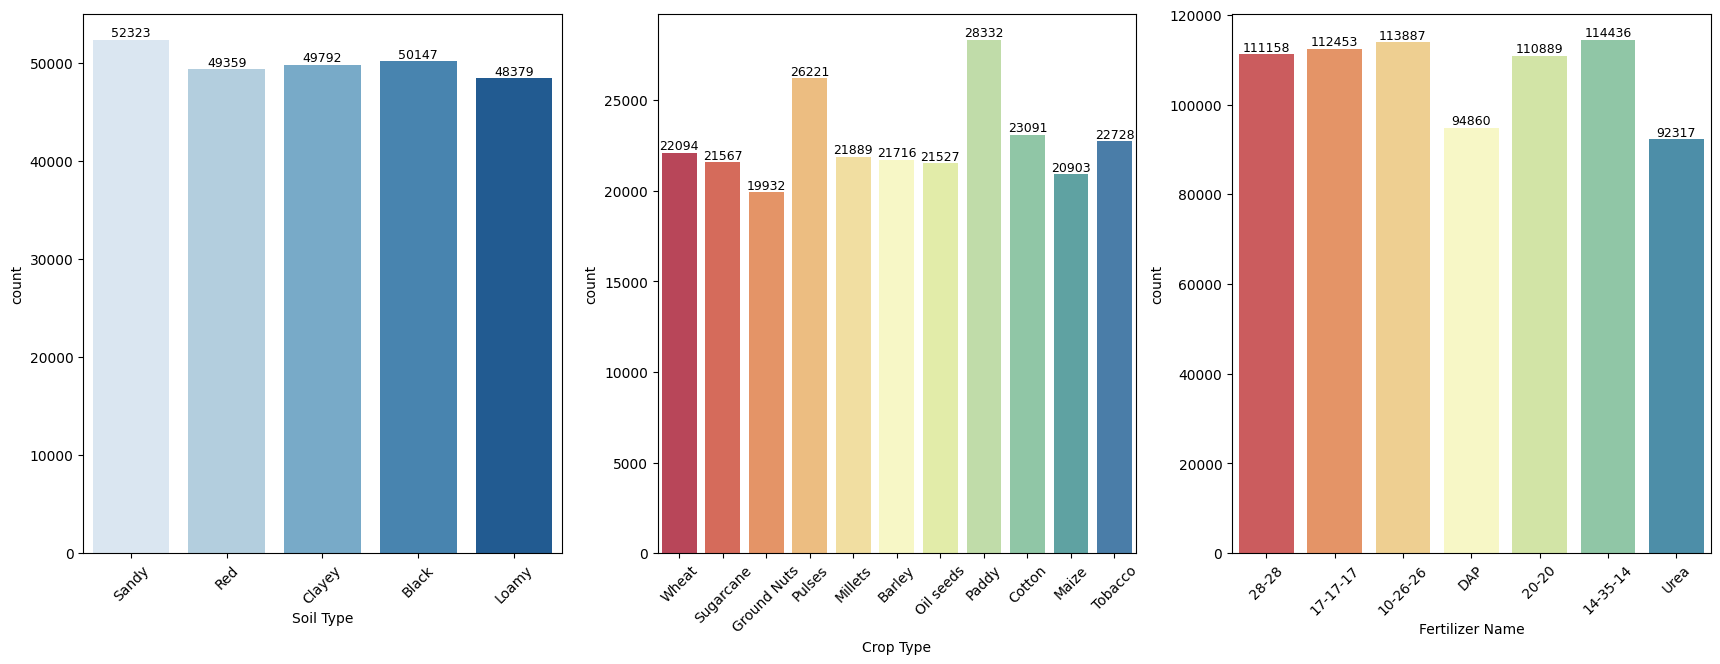

In [14]:
fig, axs = plt.subplots(1,3, figsize = (21,7))


sns.countplot(data = test_data, x = test_data['Soil Type'],ax = axs[0], palette = 'Blues')
for container in axs[0].containers:
    axs[0].bar_label(container, color = 'black', size = 9)
axs[0].tick_params(axis = 'x', rotation = 45)

sns.countplot(data = test_data, x = test_data['Crop Type'], ax = axs[1], palette = 'Spectral')
for container in axs[1].containers:
    axs[1].bar_label(container, color = 'black', size = 9)
axs[1].tick_params(axis = 'x', rotation = 45)

sns.countplot(data = train_data, x = train_data['Fertilizer Name'],ax = axs[2], palette = 'Spectral')
for container in axs[2].containers:
    axs[2].bar_label(container, color = 'black', size = 9)
axs[2].tick_params(axis = 'x', rotation = 45)

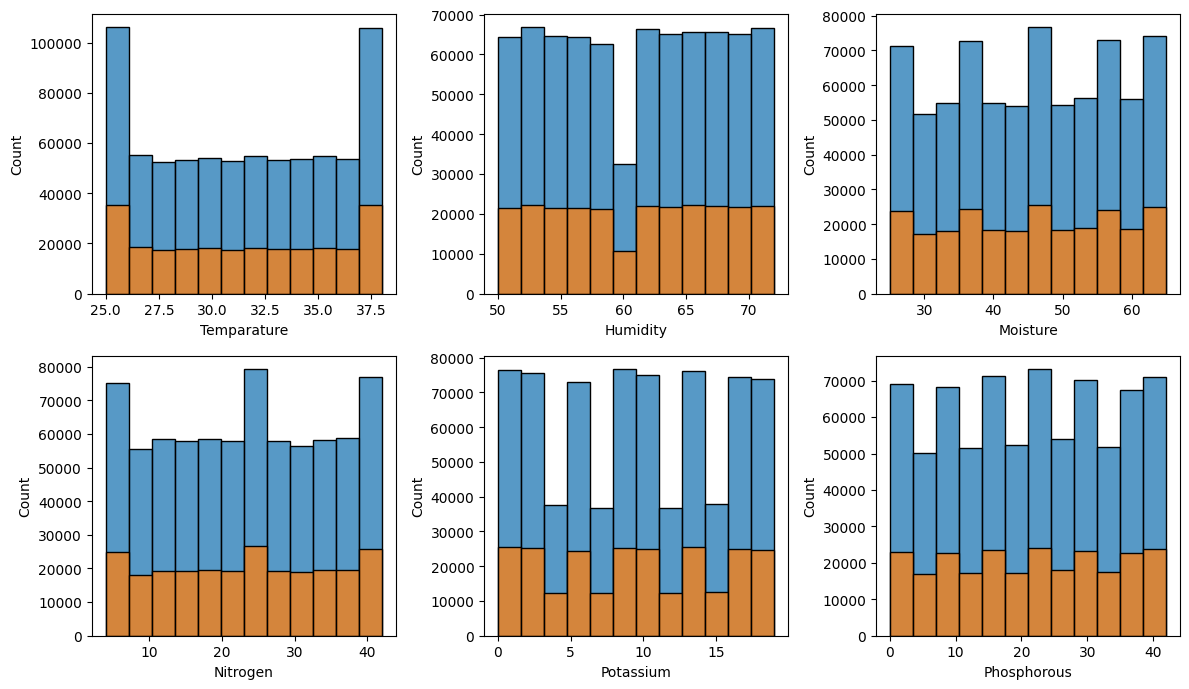

In [20]:
plt.figure(figsize = (12,7))
for pos, col in enumerate(numeric_columns):
    plt.subplot(2,3, pos+1)
    sns.histplot(data = train_data, x = train_data[col], bins = 12)
    sns.histplot(test_data[col], bins = 12)
plt.tight_layout()
plt.show()

<Axes: >

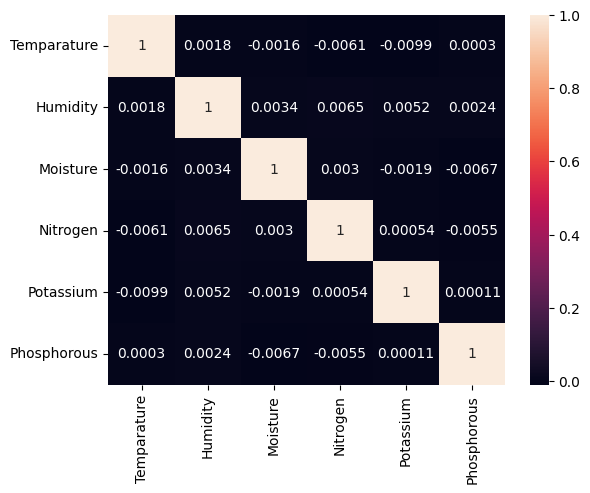

In [25]:
sns.heatmap(train_data.corr(numeric_only = True), annot = True) 

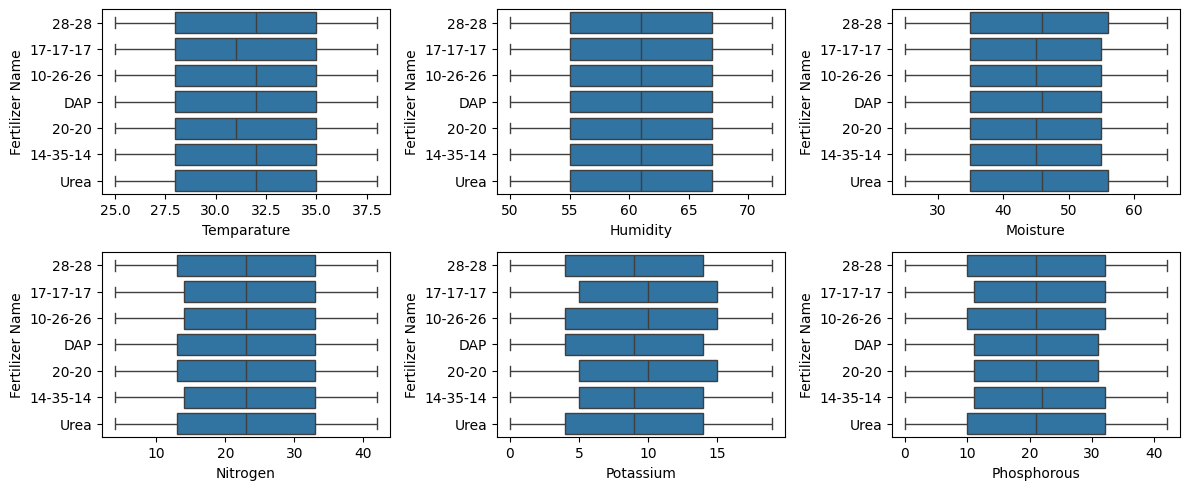

In [29]:
plt.figure(figsize = (12, 7))
for pos, col in enumerate(numeric_columns):
    plt.subplot(3,3,pos+1)
    sns.boxplot(x = train_data[col], y=train_data['Fertilizer Name'])

plt.tight_layout()
plt.show()

In [41]:
for col in numeric_columns:
    groups = [df[col] for name, df in train_data.groupby('Fertilizer Name')]
    anova, p_value = stats.f_oneway(*groups)
    print(f"{col}: ANOVA = {anova} ; P-Value = {p_value}")

Temparature: ANOVA = 5.394108695336388 ; P-Value = 1.3893926957444185e-05
Humidity: ANOVA = 18.18925005612169 ; P-Value = 3.1037347290079704e-21
Moisture: ANOVA = 48.239312723287334 ; P-Value = 1.5403067801381546e-59
Nitrogen: ANOVA = 7.97238691562154 ; P-Value = 1.2760107096064543e-08
Potassium: ANOVA = 37.44304051779124 ; P-Value = 1.0735384549242793e-45
Phosphorous: ANOVA = 19.36504098968261 ; P-Value = 1.0318803549928417e-22


##### OneHotEncoding with LabelEncoder

In [26]:
lbl = LabelEncoder()
test_data['Fertilizer Name'] = 'z'
for cat in categorial_columns:
    train_data[cat] = lbl.fit_transform(train_data[cat])
    test_data[cat] = lbl.fit_transform(test_data[cat])
test_data = test_data.drop(['Fertilizer Name'], axis = 1)

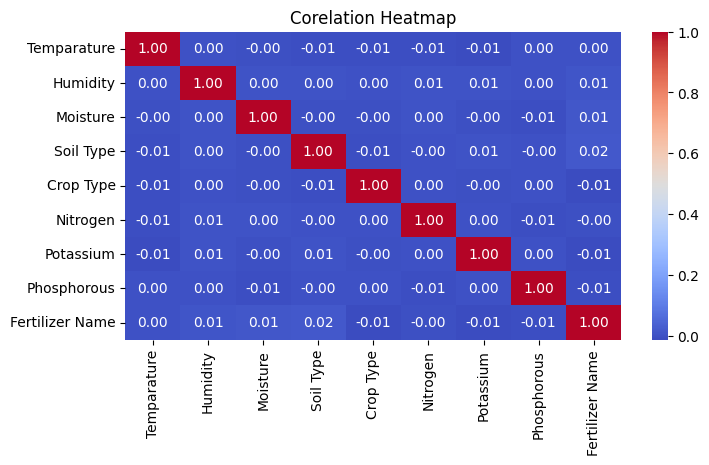

In [39]:
# Columns Corelation
corr = train_data.corr()

plt.figure(figsize = (8,4))
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corelation Heatmap')

plt.show()

In [34]:
train_data.corr()['Fertilizer Name'].sort_values(ascending = False)

Fertilizer Name    1.000000
Soil Type          0.016576
Moisture           0.011493
Humidity           0.010626
Temparature        0.001727
Nitrogen          -0.004725
Phosphorous       -0.006127
Potassium         -0.010872
Crop Type         -0.013041
Name: Fertilizer Name, dtype: float64